Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

Task 1

Epoch 100: a = 0.0997, b = 0.4330, c = 0.3503


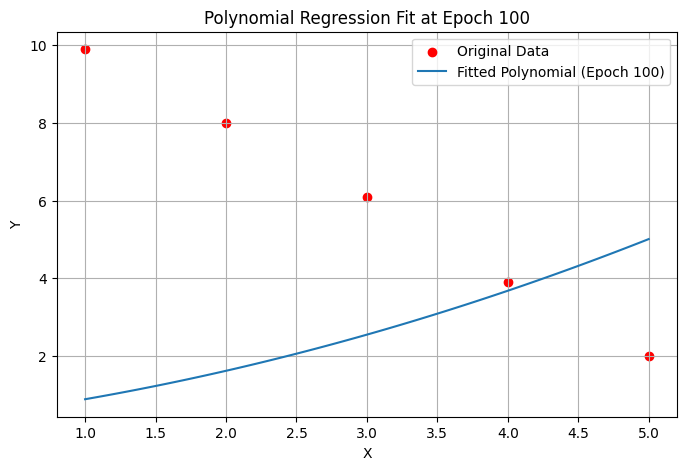

Epoch 200: a = 0.0019, b = 0.7811, c = 0.6597


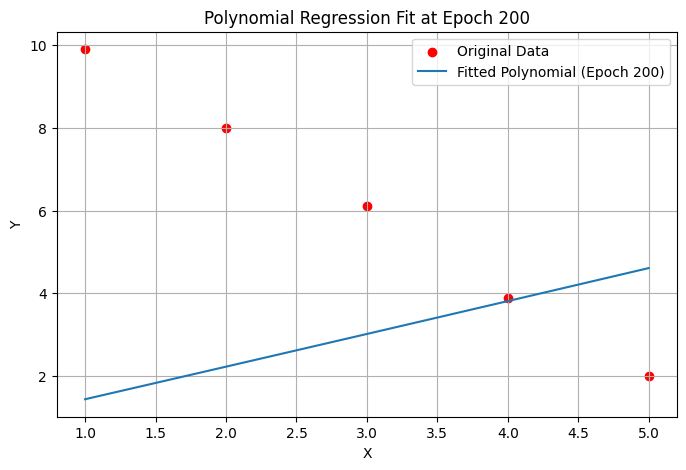

Epoch 300: a = -0.0867, b = 1.0955, c = 0.9427


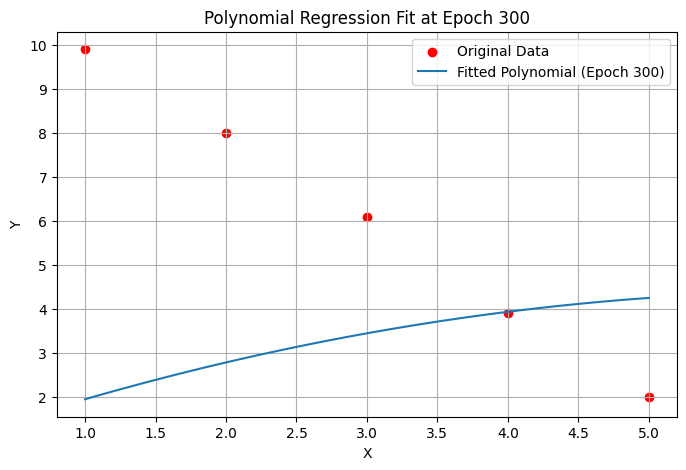

Epoch 400: a = -0.1669, b = 1.3793, c = 1.2018


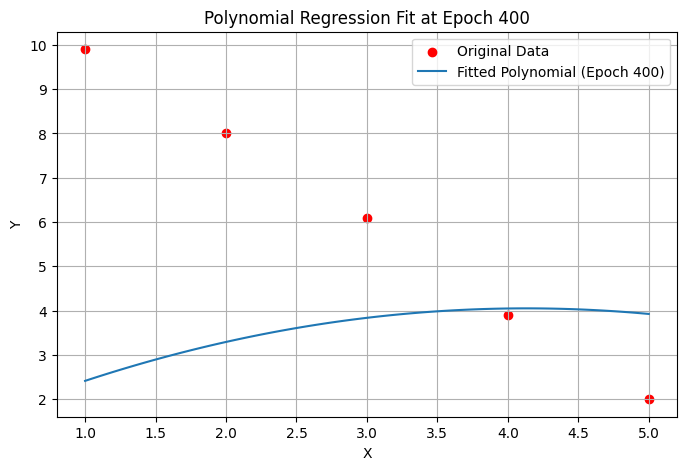

Epoch 500: a = -0.2395, b = 1.6355, c = 1.4390


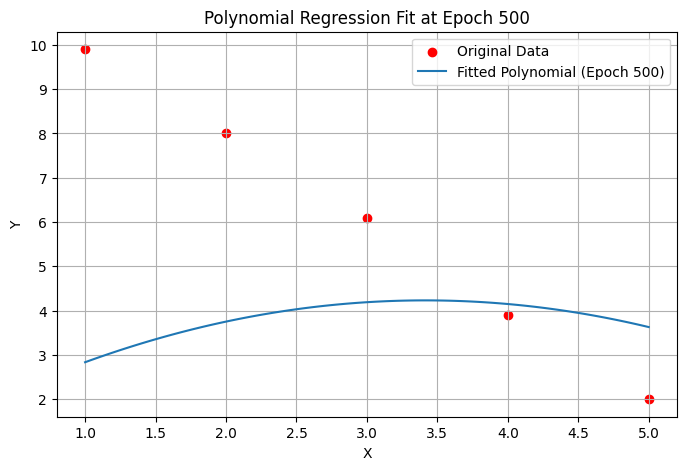

Epoch 600: a = -0.3052, b = 1.8665, c = 1.6564


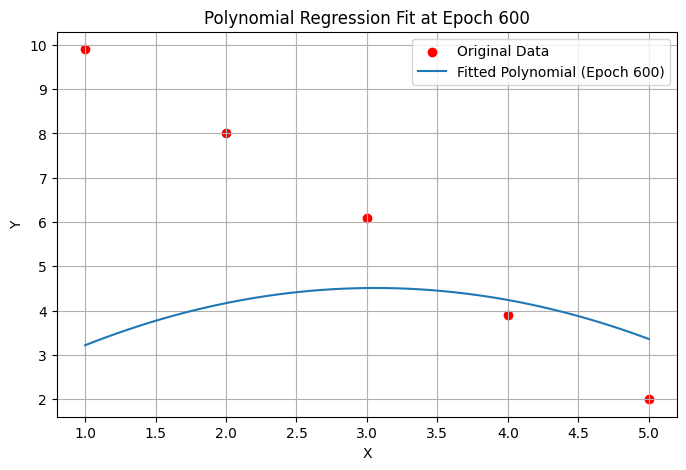

Epoch 700: a = -0.3645, b = 2.0747, c = 1.8559


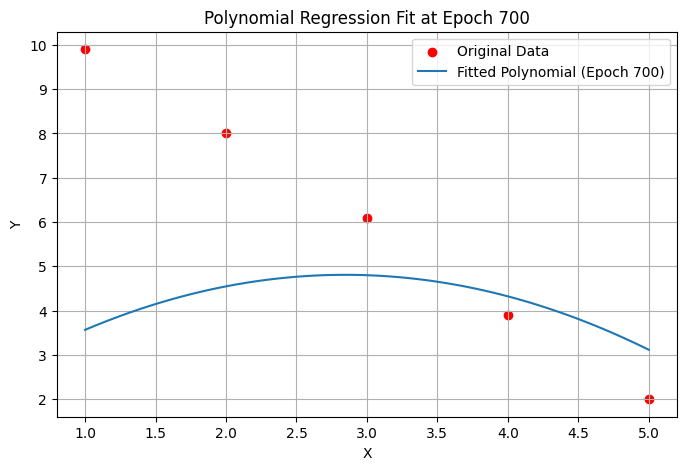

Epoch 800: a = -0.4182, b = 2.2622, c = 2.0390


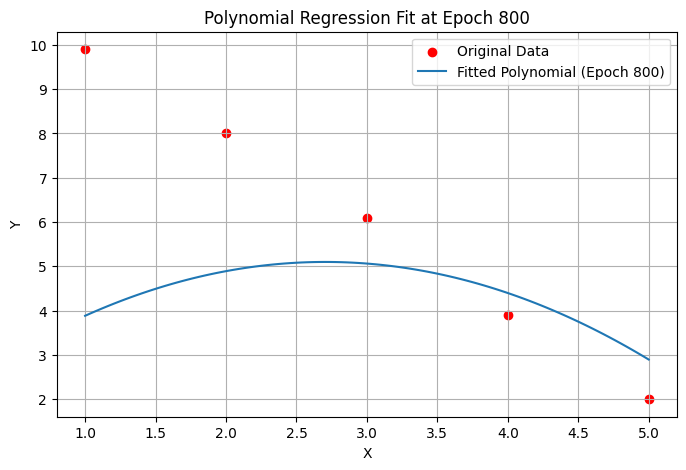

Epoch 900: a = -0.4666, b = 2.4308, c = 2.2074


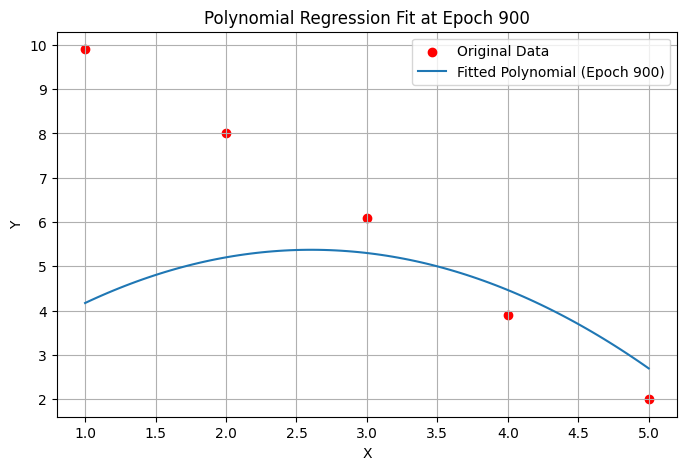

Epoch 1000: a = -0.5104, b = 2.5824, c = 2.3622


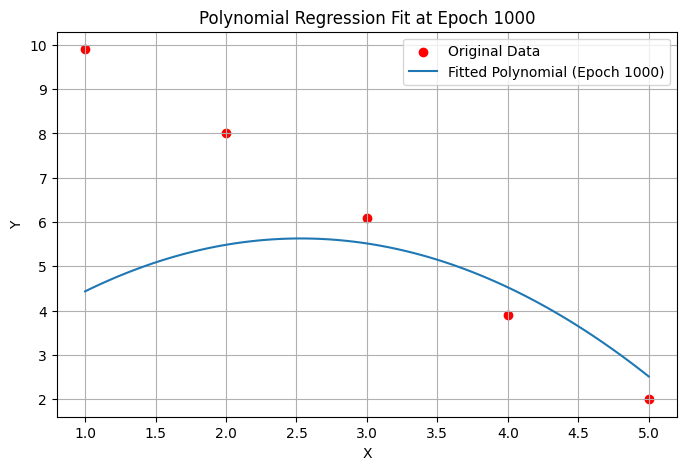

In [ ]:
data = {
    'X': [1.0, 2.0, 3.0, 4.0, 5.0],
    'Y': [9.9, 8.0, 6.1, 3.9, 2.0]
}
df = pd.DataFrame(data)

X = df['X'].values
Y = df['Y'].values

a = 0.0
b = 0.0
c = 0.0

learning_rate = 0.0001
epochs = 1000


for epoch in range(epochs):
    y_pred = a * X**2 + b * X + c
    error = y_pred - Y

    da = 2 * np.sum(error * X**2)
    db = 2 * np.sum(error * X)
    dc = 2 * np.sum(error)

    a -= learning_rate * da
    b -= learning_rate * db
    c -= learning_rate * dc

    if epoch % 100 == 0:
        print(f'Epoch {epoch}: a = {a:.4f}, b = {b:.4f}, c = {c:.4f}')
        x_plot = np.linspace(X.min(), X.max(), 100)
        y_plot = a * x_plot**2 + b * x_plot + c

        plt.figure(figsize=(8, 5))
        plt.scatter(X, Y, color='red', label='Original Data')
        plt.plot(x_plot, y_plot, label=f'Fitted Polynomial (Epoch {epoch})')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(f'Polynomial Regression Fit at Epoch {epoch}')
        plt.legend()
        plt.grid(True)
        plt.show()

Task 2

Missing values:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 31)             │           279 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            32 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 311 (1.21 KB)

 Trainable params: 311 (1.21 KB)

 Non-trainable params: 0 (0.00 B)


Test MSE: 0.3082
Test MAE: 0.3728


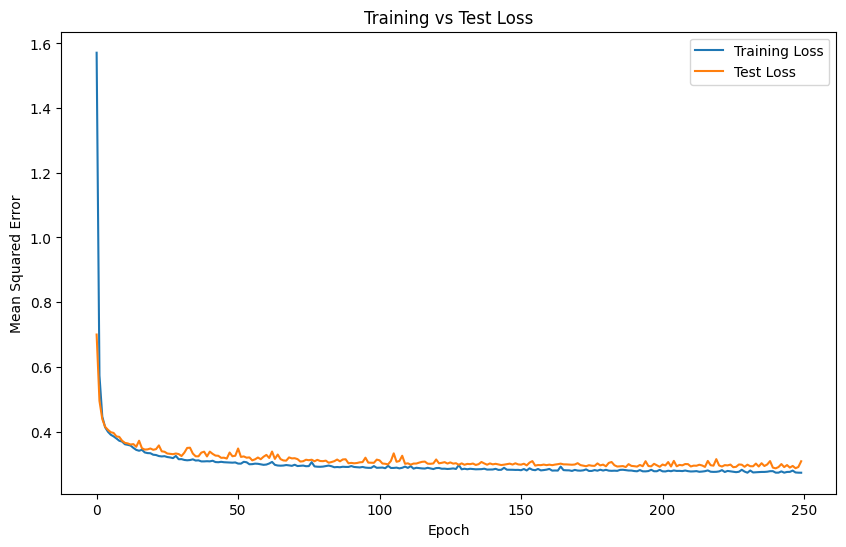

In [ ]:
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

print("Missing values:\n", df.isnull().sum())

X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    Dense(31, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1)
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

model.summary()

history = model.fit(X_train_scaled, y_train,
                    epochs=250,
                    validation_data=(X_test_scaled, y_test),
                    verbose=0)

test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTest MSE: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Training vs Test Loss')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Task 3

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)


Test MSE: 0.2652
Test MAE: 0.3529


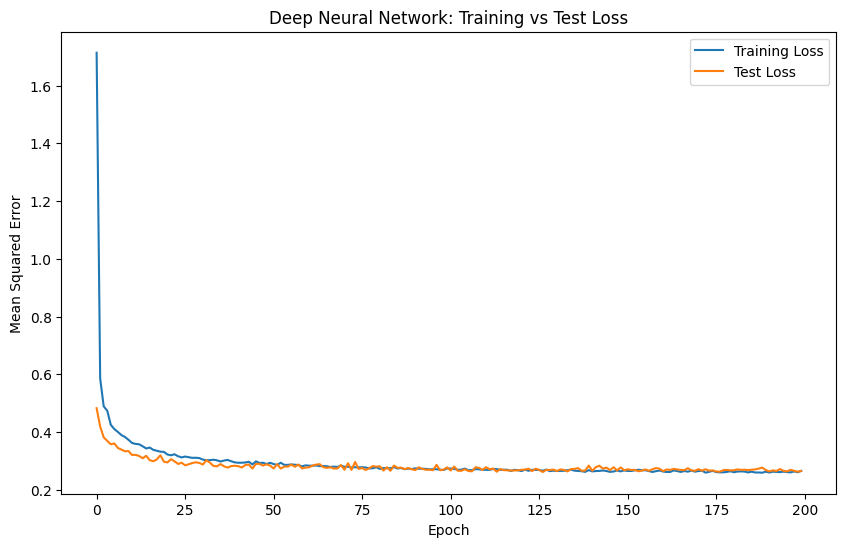

In [ ]:
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

model.summary()

history = model.fit(X_train_scaled, y_train,
                    epochs=200,
                    validation_data=(X_test_scaled, y_test),
                    verbose=0)

test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTest MSE: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Deep Neural Network: Training vs Test Loss')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Task 4

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,979 (11.64 KB)

 Trainable params: 2,979 (11.64 KB)

 Non-trainable params: 0 (0.00 B)


Test Accuracy: 0.9667


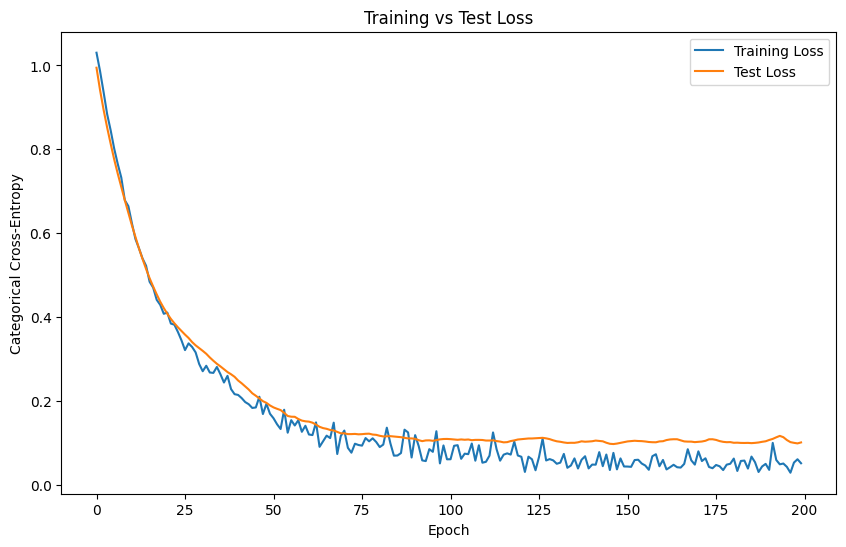

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(X_train_scaled, y_train_encoded,
                    epochs=200,
                    validation_data=(X_test_scaled, y_test_encoded),
                    verbose=0)

test_loss, test_acc = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Training vs Test Loss')
plt.ylabel('Categorical Cross-Entropy')
plt.xlabel('Epoch')
plt.legend()
plt.show()